<a href="https://colab.research.google.com/github/hASEEBjAN/TensorFlow_Random_Programs/blob/master/Iris_Dataset_effact_of_dropout_layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Model validation on the Iris dataset

The concept is to compare the regularization and dropout layers effact in CNN.


In [ ]:
from numpy.random import seed
seed(8)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection 
%matplotlib inline

In [ ]:
def read_in_and_split_data(iris_data):
    data = iris_data['data']
    labels = iris_data['target']
    data_train, data_test, labels_train, labels_test = model_selection.train_test_split(data, labels, test_size=0.1, random_state=42)
    return data_train, data_test, labels_train, labels_test


In [ ]:
iris_data = datasets.load_iris()
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)
print(train_data.shape)
print(train_targets.shape)
print(test_data.shape)
print(test_targets.shape)

(135, 4)
(135,)
(15, 4)
(15,)


In [ ]:
train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))
print(train_targets.shape)
print(test_targets.shape)

(135, 3)
(15, 3)


Create a simple model

In [ ]:
def get_model(input_shape):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=input_shape))
    model.add(tf.keras.layers.Dense(64, kernel_initializer = 'he_uniform', bias_initializer=tf.keras.initializers.constant(1), activation = 'relu'))
    model.add(tf.keras.layers.Dense(128, activation = 'relu'))
    model.add(tf.keras.layers.Dense(128, activation = 'relu'))
    model.add(tf.keras.layers.Dense(128, activation = 'relu'))
    model.add(tf.keras.layers.Dense(128, activation = 'relu'))
    model.add(tf.keras.layers.Dense(64, activation = 'relu'))
    model.add(tf.keras.layers.Dense(64, activation = 'relu'))
    model.add(tf.keras.layers.Dense(64, activation = 'relu'))
    model.add(tf.keras.layers.Dense(64, activation = 'relu'))
    model.add(tf.keras.layers.Dense(3, activation = 'softmax'))

    return model
    

In [ ]:
model = get_model(train_data[0].shape)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4

In [ ]:
def compile_model(model):
    opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
    
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])    

In [ ]:
compile_model(model)

dict_keys(['loss', 'accuracy'])

In [ ]:
def train_model(model, train_data, train_targets, epochs):
    history = model.fit(train_data,train_targets, epochs = epochs)
    return history

Run the following cell to run the training for 800 epochs.

In [ ]:
history = train_model(model, train_data, train_targets, epochs=800)

Train on 135 samples
Epoch 1/800
135/135 [==============================] - 1s 11ms/sample - loss: 1.0593 - accuracy: 0.3481
Epoch 2/800
135/135 [==============================] - 0s 757us/sample - loss: 0.9848 - accuracy: 0.4444
Epoch 3/800
135/135 [==============================] - 0s 744us/sample - loss: 0.9383 - accuracy: 0.6667
Epoch 4/800
135/135 [==============================] - 0s 733us/sample - loss: 0.9001 - accuracy: 0.6815
Epoch 5/800
135/135 [==============================] - 0s 766us/sample - loss: 0.8650 - accuracy: 0.6815
Epoch 6/800
135/135 [==============================] - 0s 745us/sample - loss: 0.8264 - accuracy: 0.6889
Epoch 7/800
135/135 [==============================] - 0s 734us/sample - loss: 0.7864 - accuracy: 0.6815
Epoch 8/800
135/135 [==============================] - 0s 733us/sample - loss: 0.7481 - accuracy: 0.6889
Epoch 9/800
135/135 [==============================] - 0s 92us/sample - loss: 0.7141 - accuracy: 0.6741
Epoch 10/800
135/135 [==============

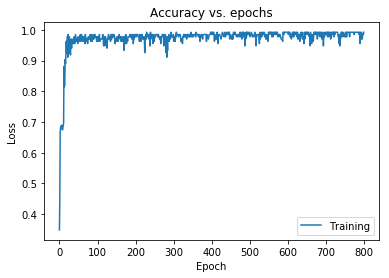

In [ ]:
# Run this cell to plot the epoch vs accuracy graph
try:
    plt.plot(history.history['accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

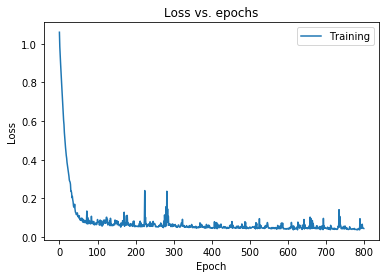

In [ ]:
#Run this cell to plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

Create a new model with regularization and dropout layers.

In [ ]:
def get_regularised_model(input_shape, dropout_rate, weight_decay):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=input_shape))
    model.add(tf.keras.layers.Dense(64, kernel_initializer = 'he_uniform', bias_initializer=tf.keras.initializers.constant(1), activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(tf.keras.layers.Dense(128, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(tf.keras.layers.Dense(128, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(128, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(tf.keras.layers.Dense(128, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.Dense(64, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(tf.keras.layers.Dense(64, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(tf.keras.layers.Dropout(dropout_rate))
    model.add(tf.keras.layers.Dense(64, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(tf.keras.layers.Dense(64, activation = 'relu',kernel_regularizer=tf.keras.regularizers.l2(weight_decay)))
    model.add(tf.keras.layers.Dense(3, activation = 'softmax'))
    
    return model
    
    
    

#### Instantiate, compile and train the model

In [ ]:
reg_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)

In [ ]:
compile_model(reg_model)

In [ ]:
reg_history = train_model(reg_model, train_data, train_targets, epochs=800)

Train on 135 samples
Epoch 1/800
135/135 [==============================] - 2s 13ms/sample - loss: 2.0058 - accuracy: 0.3333
Epoch 2/800
135/135 [==============================] - 0s 752us/sample - loss: 1.9936 - accuracy: 0.3259
Epoch 3/800
135/135 [==============================] - 0s 1ms/sample - loss: 1.9303 - accuracy: 0.3926
Epoch 4/800
135/135 [==============================] - 0s 751us/sample - loss: 1.9843 - accuracy: 0.3185
Epoch 5/800
135/135 [==============================] - 0s 752us/sample - loss: 1.9284 - accuracy: 0.4593
Epoch 6/800
135/135 [==============================] - 0s 1ms/sample - loss: 1.9301 - accuracy: 0.4148
Epoch 7/800
135/135 [==============================] - 0s 763us/sample - loss: 1.8992 - accuracy: 0.3926
Epoch 8/800
135/135 [==============================] - 0s 758us/sample - loss: 1.8296 - accuracy: 0.5185
Epoch 9/800
135/135 [==============================] - 0s 1ms/sample - loss: 1.8857 - accuracy: 0.4593
Epoch 10/800
135/135 [===================

#### Plot the learning curves

Let's now plot the loss and accuracy for the training and validation sets.

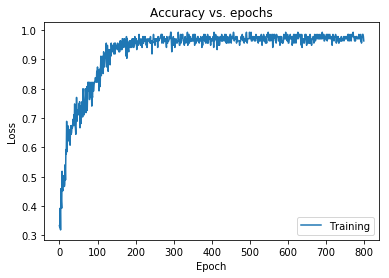

In [ ]:
#Run this cell to plot the new accuracy vs epoch graph

try:
    plt.plot(reg_history.history['accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

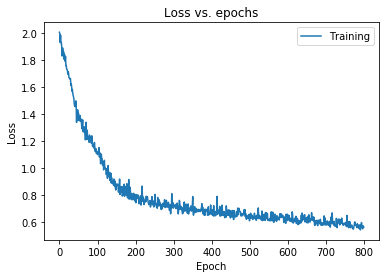

In [ ]:
#Run this cell to plot the new loss vs epoch graph

plt.plot(reg_history.history['loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [ ]:
def get_callbacks():
    earlystoppingcallback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=30,mode='min')
    reducelronplateaucallback = tf.keras.callbacks.ReduceLROnPlateau(factor=0.2, patience=20)
    
    return earlystoppingcallback, reducelronplateaucallback

Run the cell below to instantiate and train the regularised model with the callbacks.

In [ ]:
call_model = get_regularised_model(train_data[0].shape, 0.3, 0.0001)
compile_model(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=0)

In [ ]:
learning_rate_reduction.patience

20

Finally, let's replot the accuracy and loss graphs for our new model.

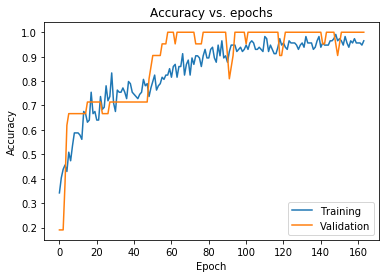

In [ ]:
try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

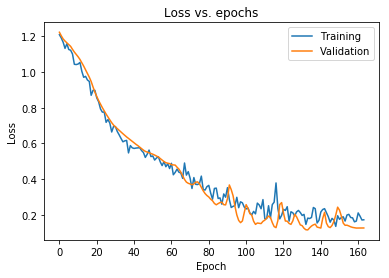

In [ ]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [ ]:
# Evaluate the model on the test set

test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.195
Test accuracy: 93.33%
